In [1]:
library(tidyverse)
library(here)
library(phangorn)
library(treeio)
library(ggtree)

devtools::load_all(".")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /mnt/expressions/mp/ychr
Loading required package: ape
Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 

Attaching package: ‘treeio’

The following object is masked from ‘package:ape’:

    drop.tip

ggtree v1.16.6  For help: https://yulab-smu.github.io/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

- Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution 2018, 35(12):3041-3043. doi: 10.1093/

Bootstrapping info for ape/phangorn: http://ape-package.ird.fr/ape_faq.html#bootphylo

In [2]:
build_tree <- function(x) root(nj(dist.ml(x)), outgroup = "chimp", resolve.root = TRUE)

In [3]:
plot_tree <- function(fasta) {
    alignment <- read.phyDat(fasta, format = "fasta")

    for (s in c("ustishim", "S_Punjabi_1", "S_Sardinian_1", "S_Saami_2", "S_Burmese_1", "S_Dai_2", "S_Turkish_1")) {
        alignment[[s]] <- NULL
    }

    alignment <- as.DNAbin(alignment)
    tr <- build_tree(alignment)
    bp <- boot.phylo(tr, alignment, build_tree, B = 100, mc.cores = 40)
    tree <- as.treedata(tr, bp)

    df <- as_tibble(tree) %>%
        filter(!is.na(label)) %>%
        select(name = label) %>%
        mutate(set = case_when(name %in% c("den4", "den8") ~ "Denisova",
                               name %in% c("spy1", "mez2", "elsidron2", "elsidron1") ~ "Neanderthal",
                               TRUE ~ "other"))

    p <- ggtree(tree, branch.length = "none") +
        geom_label(aes(label = bootstrap)) +
        xlim(0, 11)

    p %<+% df +
        geom_tiplab(aes(color = set)) +
        scale_color_manual(values = c("springgreen4", "blue2", "black"))
}

Running parallel bootstraps... done.
Calculating bootstrap values... done.


Warning message:
“Removed 14 rows containing missing values (geom_label).”

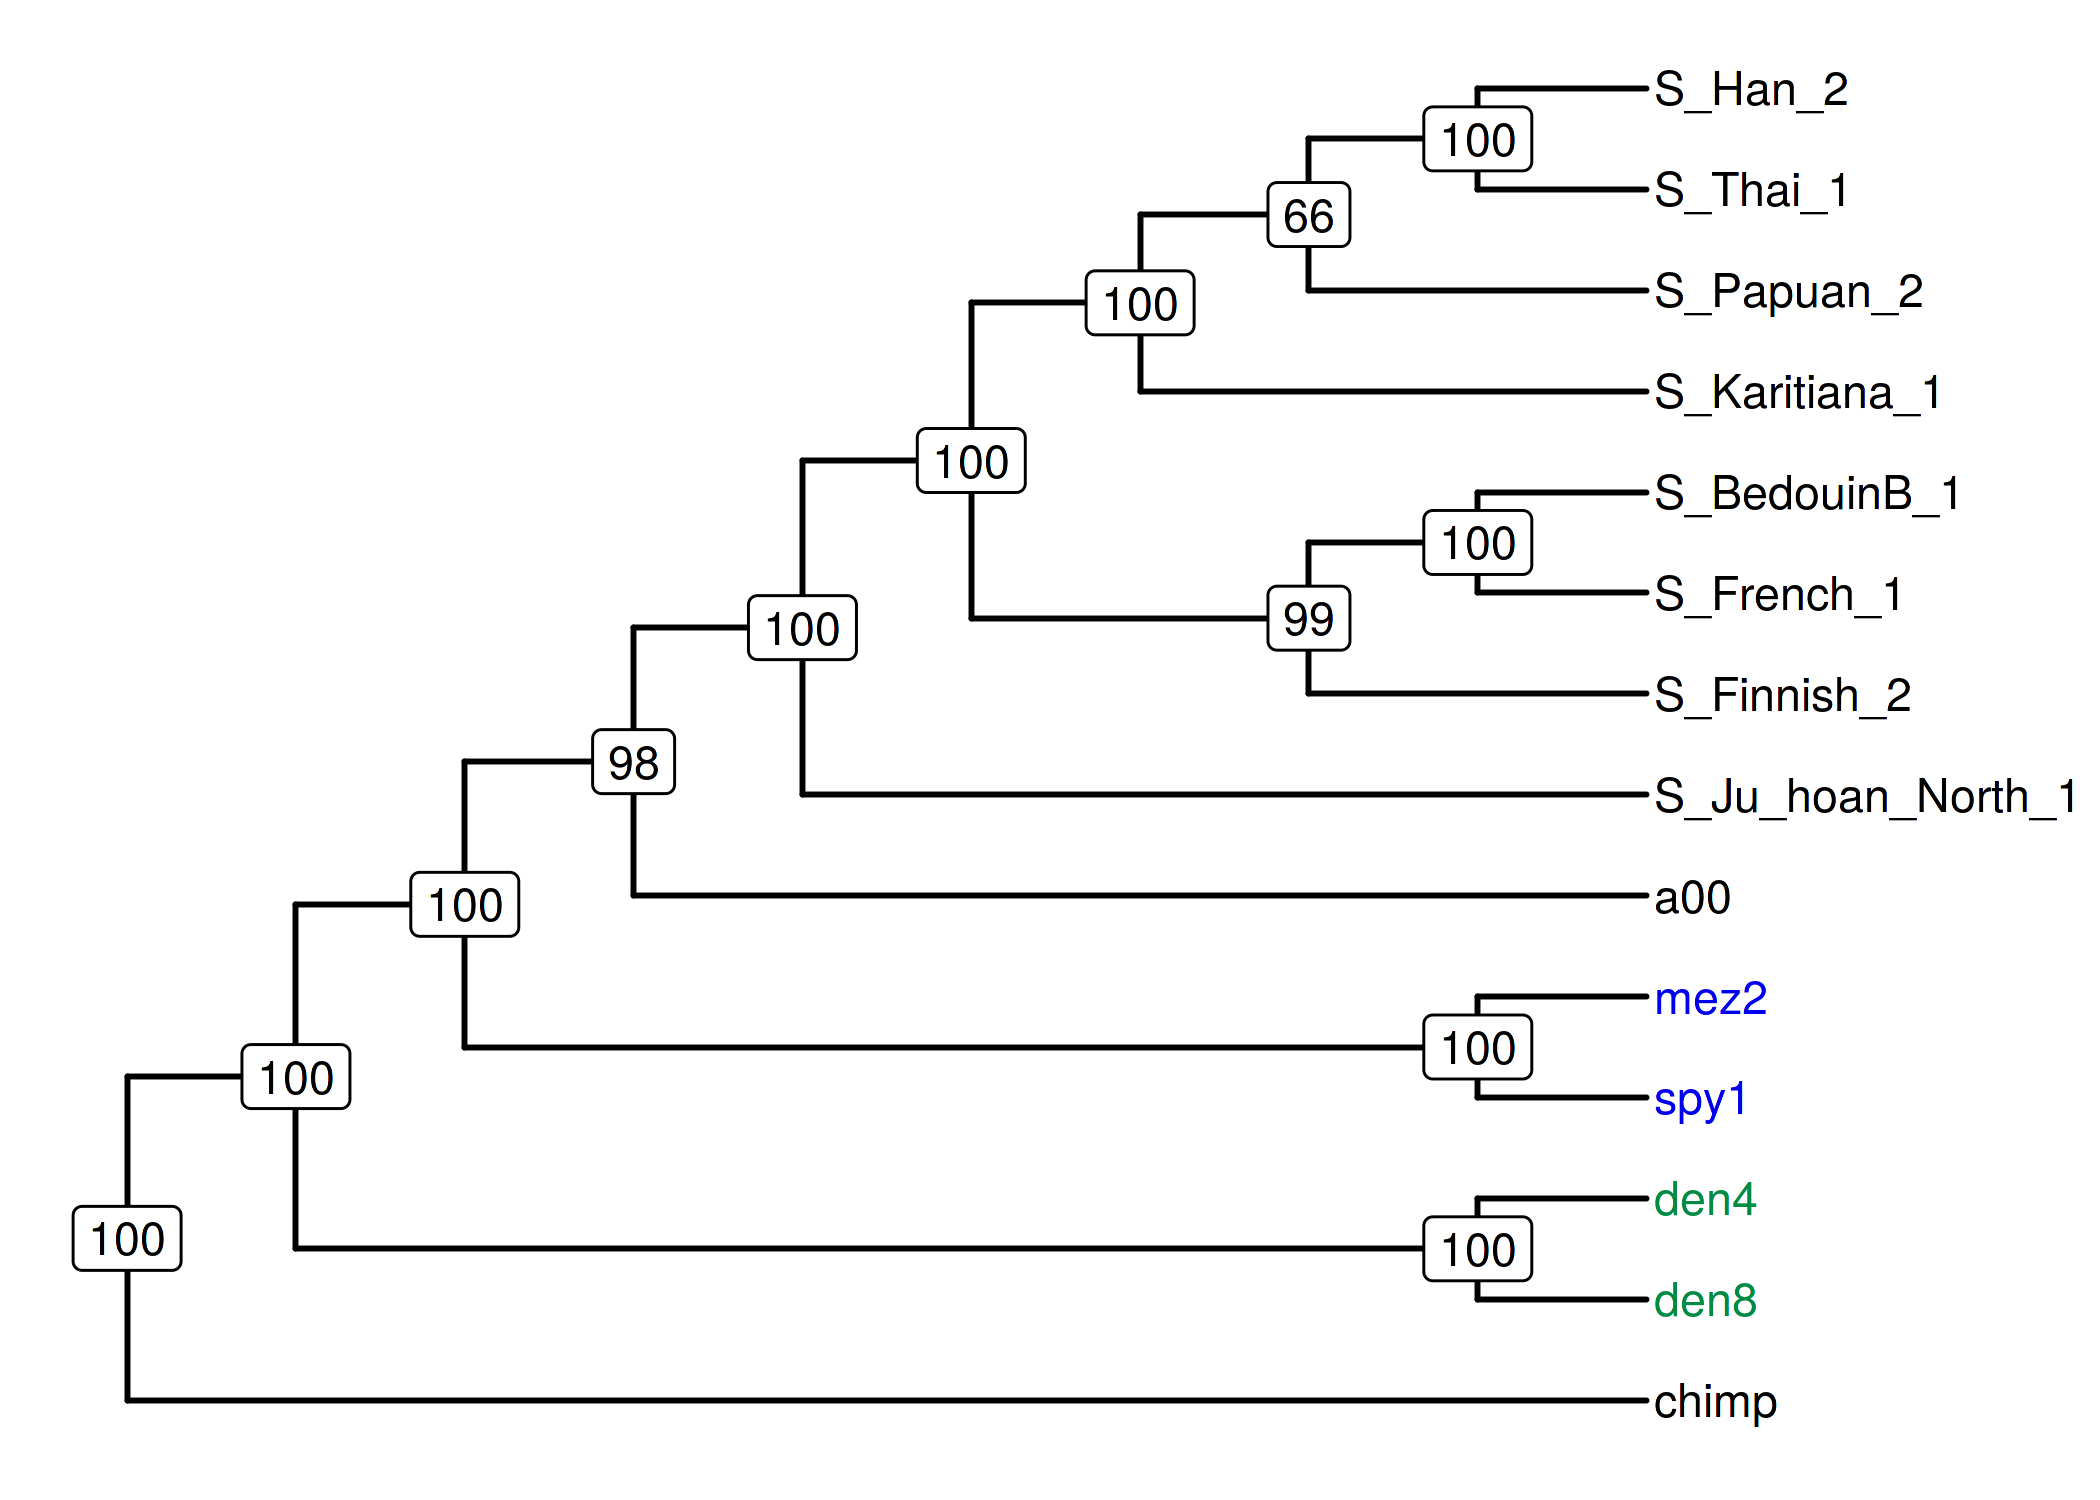

In [4]:
set_dim(7, 5)

plot_tree(here("data/fasta/full_merged_var_tvonly.fa"))

Running parallel bootstraps... done.
Calculating bootstrap values... done.


Warning message:
“Removed 15 rows containing missing values (geom_label).”

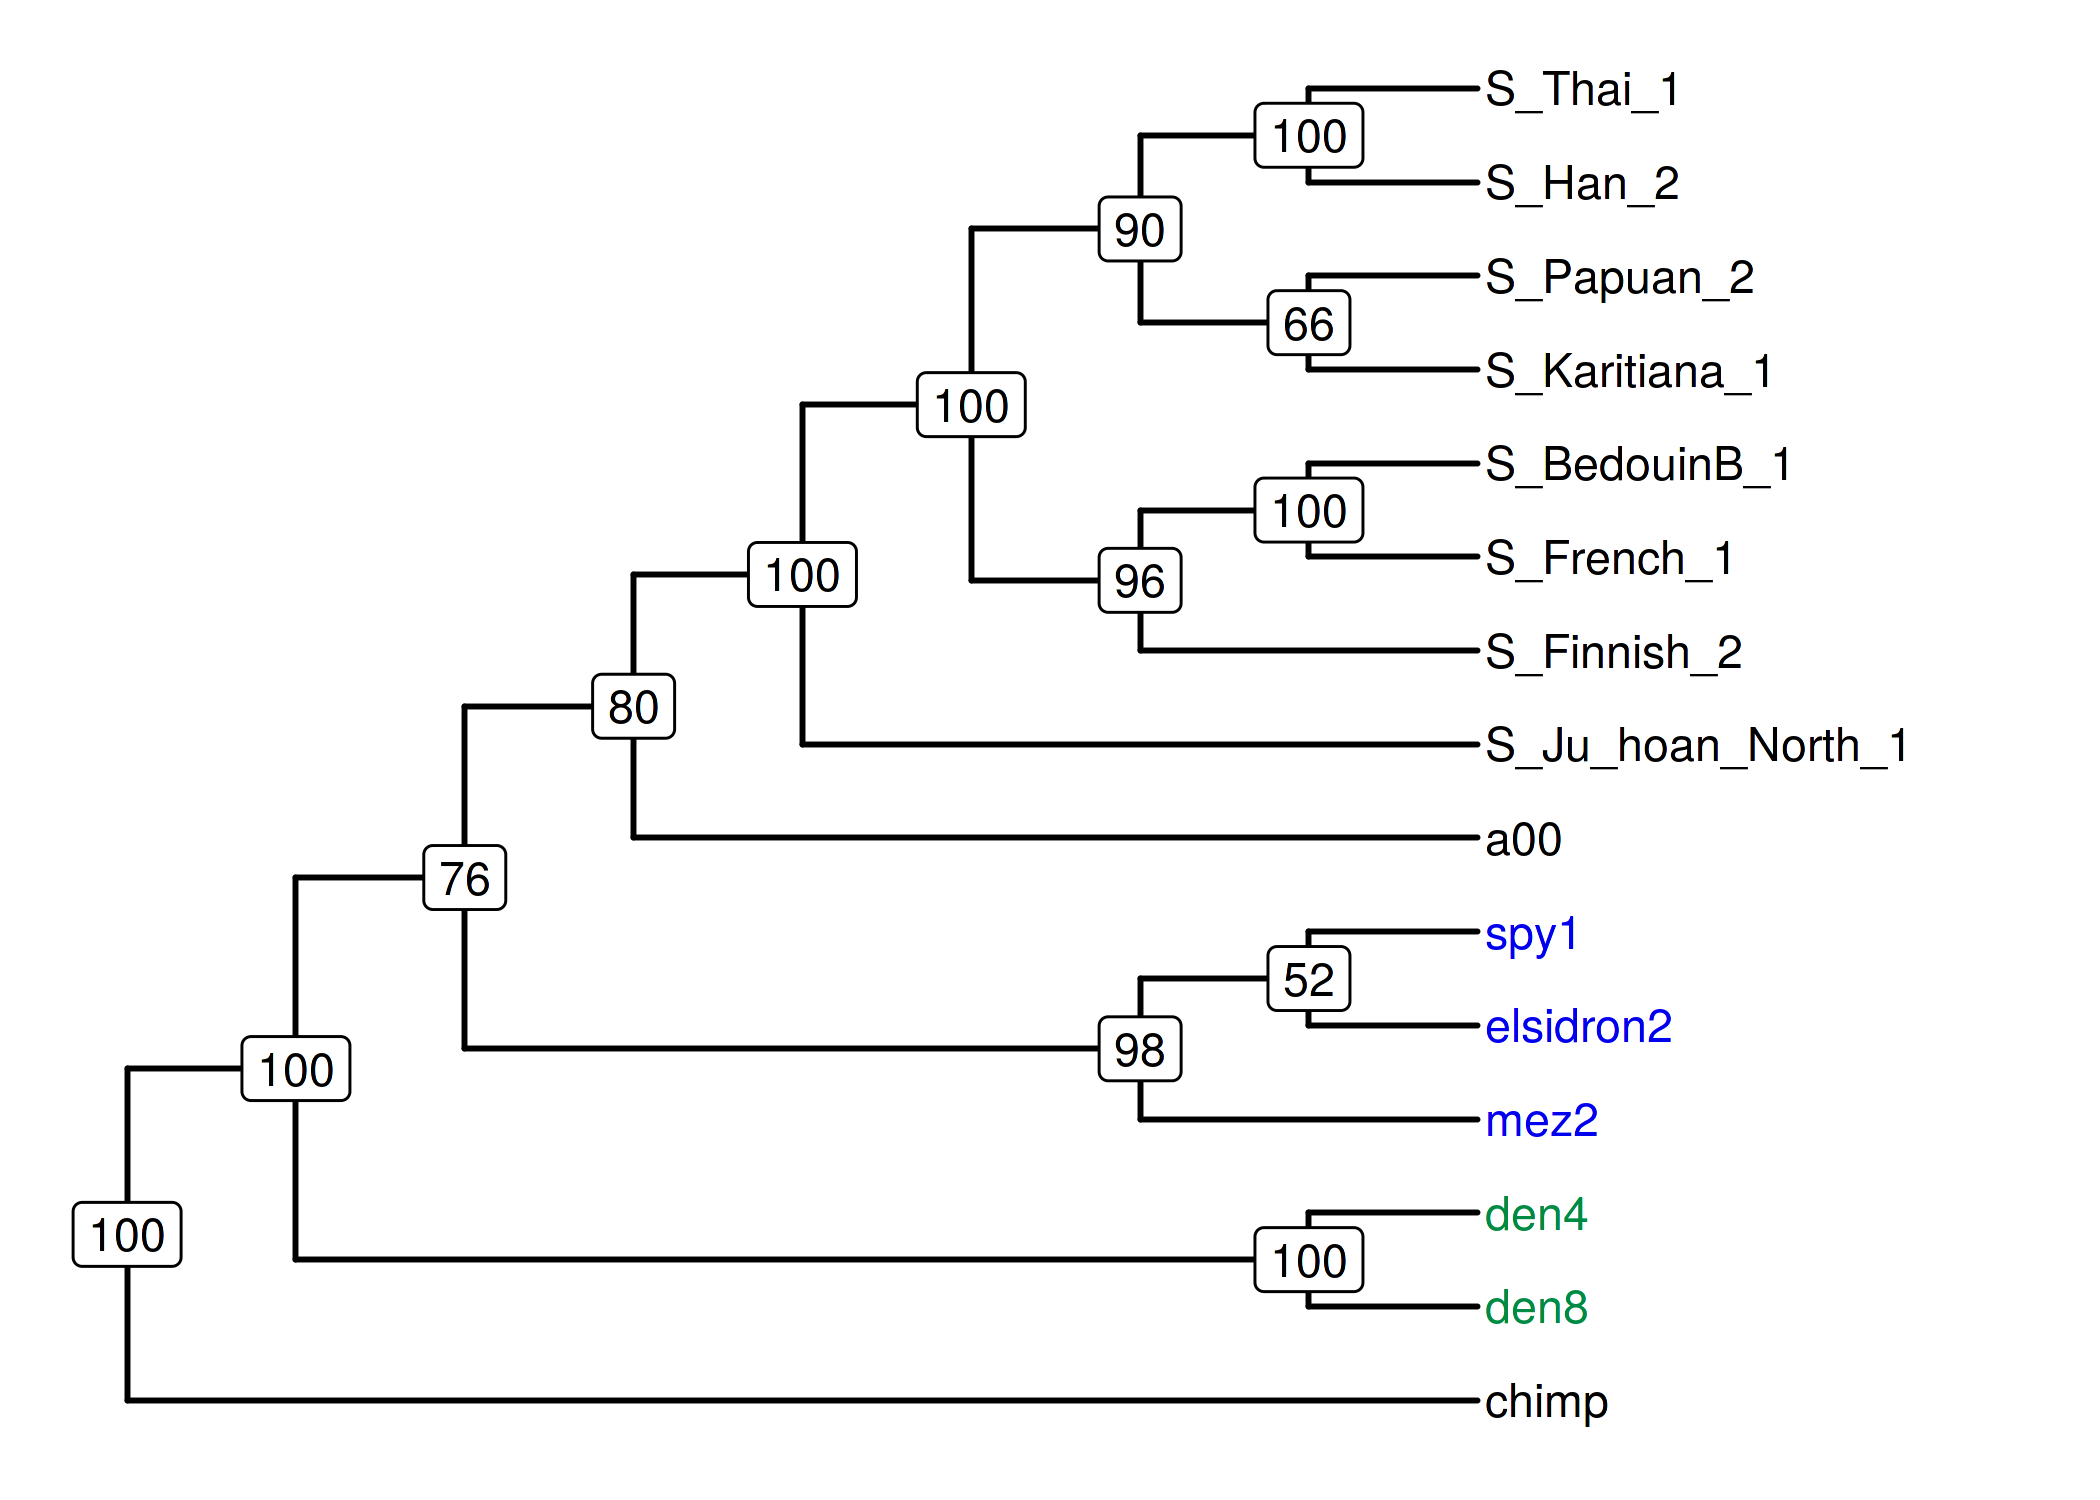

In [5]:
set_dim(7, 5)

plot_tree(here("data/fasta/lippold_merged_var_tvonly.fa"))